In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

from sklearn.manifold import TSNE


In [3]:
data = pd.read_csv('cmm_erdos_2022/pharmacy_tx.csv')

In [4]:
data['disease_code'] = data.diagnosis.str[0]

In [5]:
#drug importance by diagnosis code

data_temp = data.groupby(['drug','diagnosis'],as_index=False).size()
data_temp['num'] =data_temp['size']
del data_temp['size']

data_temp = pd.merge(data_temp,data_temp.groupby(['drug'],as_index=False).num.sum(), on=['drug'] ,how='inner')

data_temp['drug_importance_by_diag'] = (data_temp['num_x']/data_temp['num_y'])*100
data_temp = data_temp[['drug','diagnosis','drug_importance_by_diag']]

data_temp = pd.pivot_table(data_temp,columns=['diagnosis'],index=['drug']).fillna(0).reset_index()
data_temp


drug drug_importance_by_diag            \
diagnosis                                           A00.82    A13.39   
0                  branded antimab                0.045003  0.000000   
1                  branded bovirol                0.000000  0.000000   
2                    branded brede                0.000000  0.000000   
3           branded choxestamenium                0.000000  0.000000   
4            branded cibroniudosin                0.000000  0.000000   
..                             ...                     ...       ...   
109             generic tanoclolol                0.000000  0.000000   
110        generic thiostasteglume                0.000000  5.481856   
111            generic todiadianic                0.000000  0.000000   
112                 generic tovane                0.000000  0.622074   
113              generic vocopirin                0.000000  0.000000   

                                                                         ...  \
diagnosis    A14.01 A22.87    A45.07 B03.27 B05.36    B42.10     B45.03  ...   
0          0.000000    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   
1          0.000000    0.0  0.000000    0.0    0.0  1.585574   0.000000  ...   
2          0.000000    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   
3          0.000000    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   
4          0.000000    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   
..              ...    ...       ...    ...    ...       ...        ...  ...   
109        0.000000    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   
110        0.000000    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   
111        0.000000    0.0  0.000000    0.0    0.0  0.000000  95.304392  ...   
112        0.000000    0.0  0.086885    0.0    0.0  0.000000   0.000000  ...   
113        1.673286    0.0  0.000000    0.0    0.0  0.000000   0.000000  ...   

                                                                              \
diagnosis     Y11.84     Y51.55 Y97.47    Z04.98 Z20.23 Z25.06 Z34.94 Z66.42   
0           0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
1           0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
2           0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
3           0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
4           0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
..               ...        ...    ...       ...    ...    ...    ...    ...   
109         0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
110         0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
111         0.000000   0.000000    0.0  0.000000    0.0    0.0    0.0    0.0   
112        38.401434   7.054593    0.0  0.008447    0.0    0.0    0.0    0.0   
113         0.000000  12.762332    0.0  0.000000    0.0    0.0    0.0    0.0   

                                
diagnosis    Z95.40     Z98.86  
0          0.000000   0.000000  
1          0.000000   0.000000  
2          0.000000   0.000000  
3          0.000000   0.000000  
4          0.899864   0.000000  
..              ...        ...  
109        0.000000   0.000000  
110        0.000000  76.212536  
111        0.000000   0.000000  
112        0.000000   0.000000  
113        0.000000   0.000000  

[114 rows x 134 columns]

We believe the drugs follows the following disease codes:

# ICD-10 Diagnostic Codes From A to Z

A: Infectious and parasitic diseases

B: Infectious and parasitic diseases

C: Cancer

D: Neoplasms, blood, and blood-forming organs

E: Endocrine, nutritional, or metabolic

F: Mental and behavioral disorders

G: Nervous system

H: Eyes, ears, nose, and throat

I: Circulatory system

J: Respiratory system

K: Digestive system

L: Skin

M: Musculoskeletal system

N: Genitourinary system

O: Pregnancy and childbirth

P: Perinatal conditions

Q: Congenital and chromosomal abnormalities

R: Abnormal clinical and lab findings

S: Injury, poisoning, and other external causes

T: Injury, poisoning, and other external causes

U: Used for emergency designation

V: External causes of morbidity

W: External causes of morbidity

X: External causes of morbidity

Y: External causes of morbidity

Z: Factors influencing health status and contact with health services

In [6]:
#drug importance by disease code

data_temp_disease = data.groupby(['drug','disease_code'],as_index=False).size()
data_temp_disease['num'] =data_temp_disease['size']
del data_temp_disease['size']

data_temp_disease = pd.merge(data_temp_disease,data_temp_disease.groupby(['drug'],as_index=False).num.sum(), on=['drug'] ,how='inner')

data_temp_disease['drug_importance_by_disease_code'] = (data_temp_disease['num_x']/data_temp_disease['num_y'])*100
data_temp_disease = data_temp_disease[['drug','disease_code','drug_importance_by_disease_code']]

data_temp_disease = pd.pivot_table(data_temp_disease,columns=['disease_code'],index=['drug']).fillna(0).reset_index()
data_temp_disease

drug drug_importance_by_disease_code  \
disease_code                                                        A   
0                     branded antimab                        0.045003   
1                     branded bovirol                        0.000000   
2                       branded brede                        0.000000   
3              branded choxestamenium                        0.000000   
4               branded cibroniudosin                        0.000000   
..                                ...                             ...   
109                generic tanoclolol                        0.000000   
110           generic thiostasteglume                        5.481856   
111               generic todiadianic                        0.000000   
112                    generic tovane                        0.708959   
113                 generic vocopirin                        1.673286   

                                                                        \
disease_code          B         C    D         E          G          H   
0              1.532407  0.000000  0.0  0.000000   0.000000  81.225466   
1              1.585574  0.000000  0.0  0.000000  77.980961   0.000000   
2              0.000000  0.261567  0.0  0.000000   0.000000   0.000000   
3              0.000000  0.000000  0.0  0.000000  63.616376  17.567665   
4              2.130609  0.000000  0.0  0.000000   0.000000   0.000000   
..                  ...       ...  ...       ...        ...        ...   
109            0.000000  0.000000  0.0  0.803504  38.921390   0.000000   
110            0.000000  0.000000  0.0  1.277462   0.000000  16.171826   
111           95.304392  0.000000  0.0  0.431544   0.000000   0.000000   
112            0.000000  0.000000  0.0  0.138775   0.000000  27.348916   
113            0.000000  0.000000  0.0  0.000000   0.000000   0.000000   

                                  ...                                     \
disease_code         I         J  ...          Q         R    S        T   
0             0.000000  8.426104  ...   0.000000  0.000000  0.0  3.49875   
1             0.000000  0.000000  ...   2.800944  0.061023  0.0  0.00000   
2             0.000000  0.000000  ...   0.000000  0.000000  0.0  0.00000   
3             0.032307  0.000000  ...  12.017194  0.000000  0.0  0.00000   
4             0.000000  0.000000  ...   0.000000  0.000000  0.0  0.00000   
..                 ...       ...  ...        ...       ...  ...      ...   
109           0.000000  0.000000  ...   0.000000  0.000000  0.0  0.00000   
110           0.000000  0.000000  ...   0.000000  0.000000  0.0  0.00000   
111           0.000000  0.000000  ...   0.000000  0.000000  0.0  0.00000   
112           0.000000  0.250398  ...   0.000000  0.000000  0.0  0.00000   
113           0.000000  0.000000  ...   0.000000  0.000000  0.0  0.00000   

                                                                             
disease_code         U         V          W         X          Y          Z  
0              0.00000  0.000000   0.000000  0.000000   0.000000   0.000000  
1              0.00000  0.000000   0.000000  0.000000   0.000000   0.000000  
2              0.00000  1.645620   0.000000  0.000000   0.000000   0.000000  
3              0.00000  0.000000   6.158016  0.000000   0.000000   0.000000  
4              0.00000  0.000000   0.000000  0.000000   0.000000   0.899864  
..                 ...       ...        ...       ...        ...        ...  
109            0.00000  5.060091  20.890752  0.000000   0.000000   0.000000  
110            0.00000  0.000000   0.000000  0.856321   0.000000  76.212536  
111            0.00000  0.000000   1.027485  0.000000   0.000000   0.000000  
112           25.39943  0.000000   0.689048  0.000000  45.456026   0.008447  
113            0.00000  0.000000   0.000000  0.000000  12.762332   0.000000  

[114 rows x 26 columns]

In [16]:
# finding disease code which a drug is most prescribed for

for row in data_temp.index:
    max_code='';max=0
    for col in data_temp.columns[1:]:
        if data_temp.loc[row,col] >max:
            max=data_temp.loc[row,col]
            max_code=col[1]

    data_temp.loc[row,'prescribed_most_for'] = max_code

data_temp[['drug','prescribed_most_for']]

,drug,prescribed_most_for
diagnosis,,
0,branded antimab,H36.57
1,branded bovirol,G99.93
2,branded brede,P07.55
3,branded choxestamenium,G51.87
4,branded cibroniudosin,K32.86
...,...,...
109,generic tanoclolol,G99.93
110,generic thiostasteglume,Z98.86
111,generic todiadianic,B45.03


# TSNE projection

In [25]:
tsne_model = TSNE(perplexity=15,metric='cosine',n_iter=500,init='random',learning_rate='auto')
pts = tsne_model.fit_transform(data_temp.iloc[:,1:-1])

df=pd.DataFrame(pts,columns=['proj1','proj2'])
df['diagnosis code']=data_temp['prescribed_most_for']
df= df.sort_values(by='diagnosis code')


/Users/mitabanik/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/Users/mitabanik/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


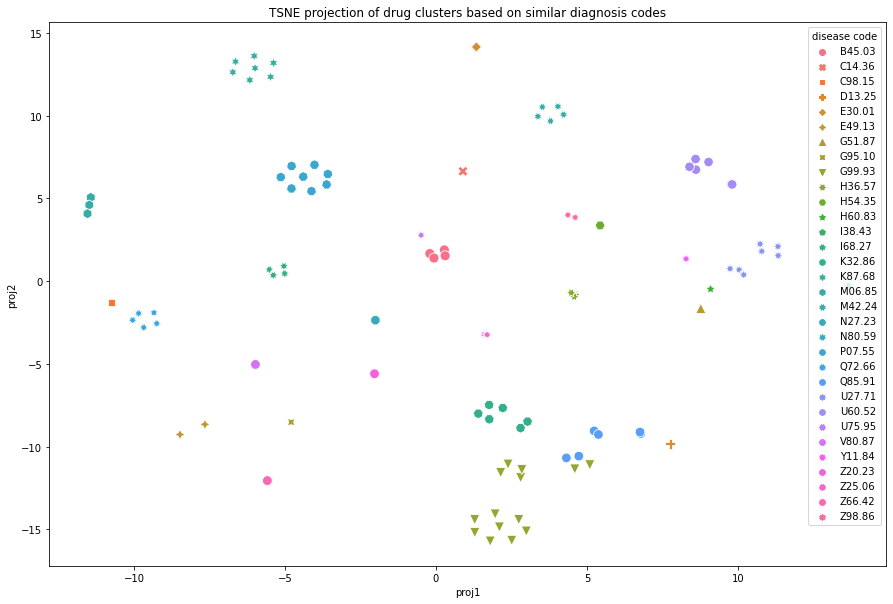

In [26]:
fig, ax = plt.subplots(figsize=(15,10))

sns.color_palette("tab10")
ax = sns.scatterplot(data=df,x="proj1",y="proj2",hue='disease code',s=100,style="disease code")
ax.set_title('TSNE projection of drug clusters based on similar diagnosis codes')
plt.show()